# 1 读取并查看数据集

In [1]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import io
from scipy.stats import boxcox

## 1.1 读取数据集

In [2]:
df = pd.read_csv(r"D:\FDU\课程作业\大数据挖掘\archive\US_Accidents_Dec21_updated.csv", sep=',')

In [3]:
# 查看数据形状：约为300w行，47列
print("数据集的形状为:",(df.shape))

数据集的形状为: (2845342, 47)


In [4]:
# 查看前5行的数据
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
# 查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
df["Description"]

0          Between Sawmill Rd/Exit 20 and OH-315/Olentang...
1                         At OH-4/OH-235/Exit 41 - Accident.
2                           At I-71/US-50/Exit 1 - Accident.
3                            At Dart Ave/Exit 21 - Accident.
4                         At Mitchell Ave/Exit 6 - Accident.
                                 ...                        
2845337                             At Market St - Accident.
2845338      At Camino Del Rio/Mission Center Rd - Accident.
2845339    At Glassell St/Grand Ave - Accident. in the ri...
2845340       At CA-90/Marina Fwy/Jefferson Blvd - Accident.
2845341                At Highland Ave/Arden Ave - Accident.
Name: Description, Length: 2845342, dtype: object

# 2 数据集概述

#### ID:这是事故记录的唯一标识符。
#### Severity:显示事故的严重程度，数字在1到4之间，其中1表示对交通的影响最小(即由于事故造成的短延误)，4表示对交通的影响较大(即长延误)。
#### Start_Time:在本地时区显示事故的开始时间。
#### End_Time:在本地时区显示事故的结束时间。
#### Start_Lat:在GPS坐标中显示起始点的纬度。
#### Start_Lng:以GPS坐标显示起始点的经度。
#### End_Lat:在GPS坐标中显示终点的纬度。
#### End_Lng:在终点的GPS坐标中显示经度。
#### Distance(mi):受事故影响的道路范围长度。
#### Description:显示事故的自然语言描述。
#### Number:显示地址栏的门牌号。
#### Street:显示地址字段中的街道名称。
#### Side:在地址栏中显示街道的相对边(右/左)。
#### City:在地址字段中显示城市。
#### County:在地址字段中显示县。
#### State:在显示地址字段的州。
#### Zipcode:在地址字段中显示邮政编码。
#### Country:在地址字段中显示国家。
#### Timezone:根据事故发生的地点(东部、中部等)显示时区。
#### Airport_Code:表示一个基于机场的气象站，它是离事故地点最近的气象站。
#### Weather_Timestamp:显示天气观测记录的时间戳(以当地时间为单位)。温度(F):显示温度(华氏)。
#### Wind_Chill(F):显示风寒(华氏度)。“湿度(%)”:湿度(以百分比表示)。气压(in):显示气压(单位:英寸)。能见度(mi):显示能见度(以英里为单位)。
#### Wind_Direction:显示风向。
#### Wind_Speed(mph):显示风速(英里每小时)。降水量(单位):如果有降雨量，以英寸为单位。
#### Weather_Condition:显示天气状况(雨、雪、雷雨、雾等)。

# 3 EDA(数据探索性分析)

In [7]:
import matplotlib
matplotlib.rc("font", family='Microsoft YaHei')

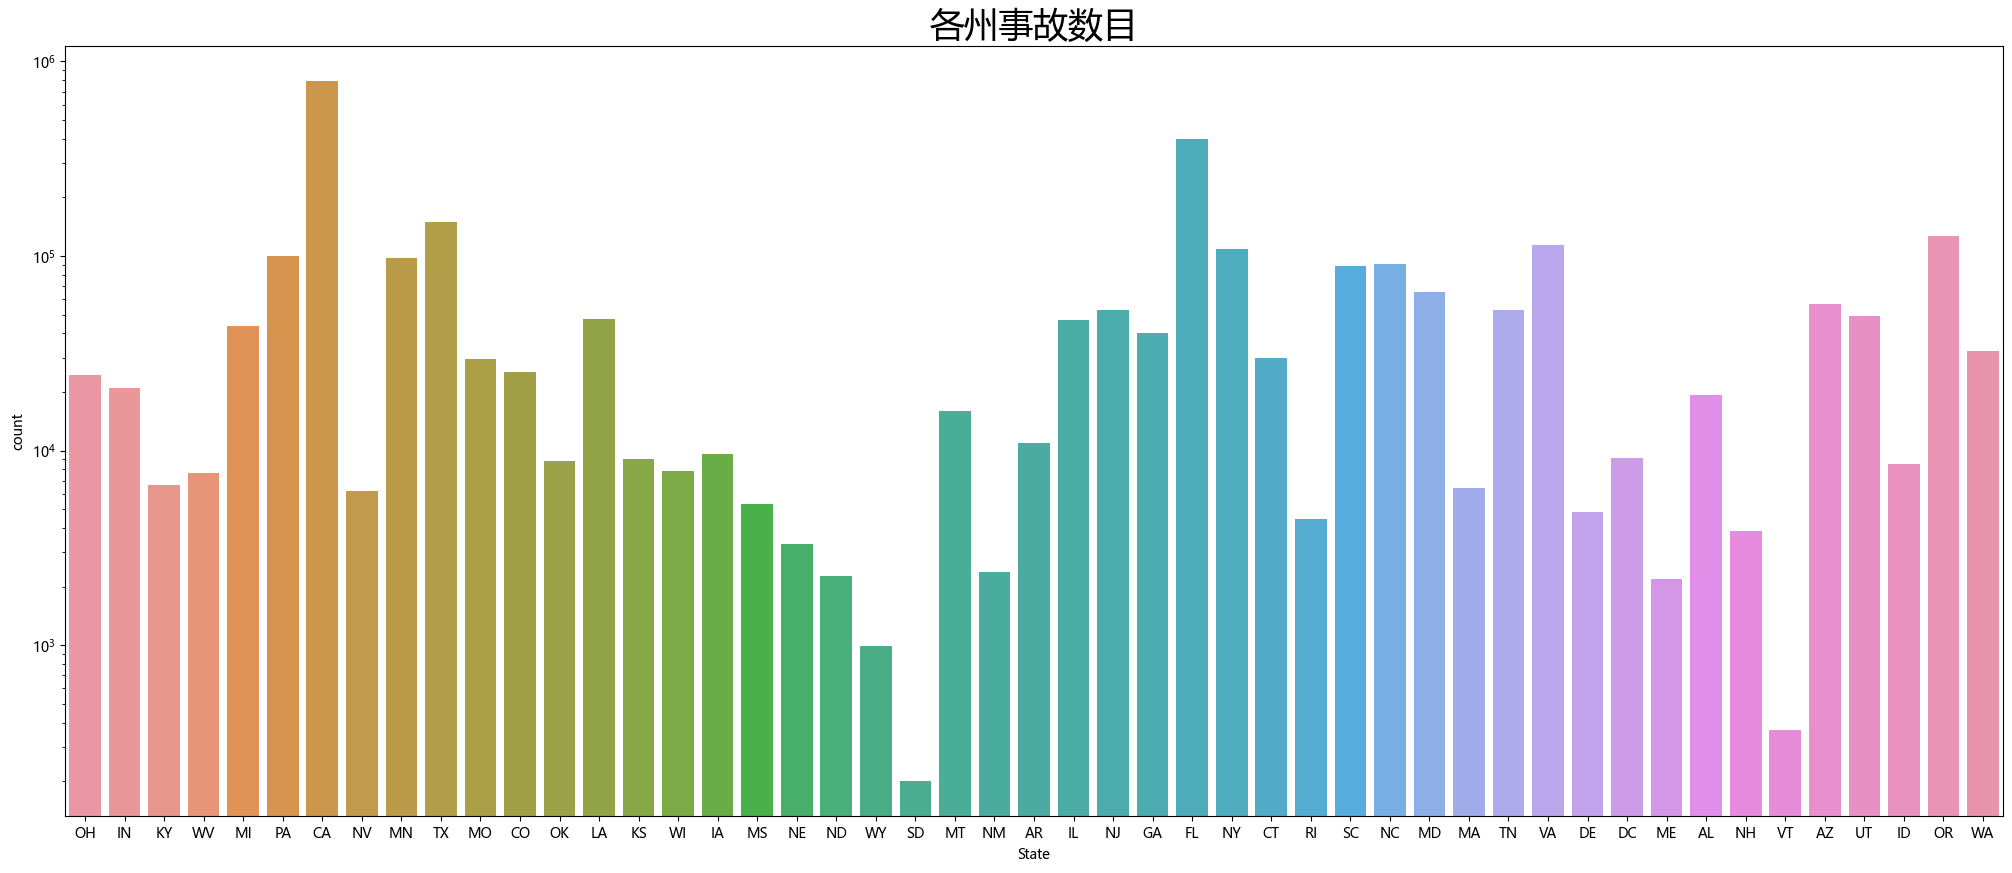

In [8]:
plt.figure(figsize=(25,10))
sns.countplot(x="State",data=df)
plt.yscale("log")
plt.title("各州事故数目",fontsize=25)
plt.show()

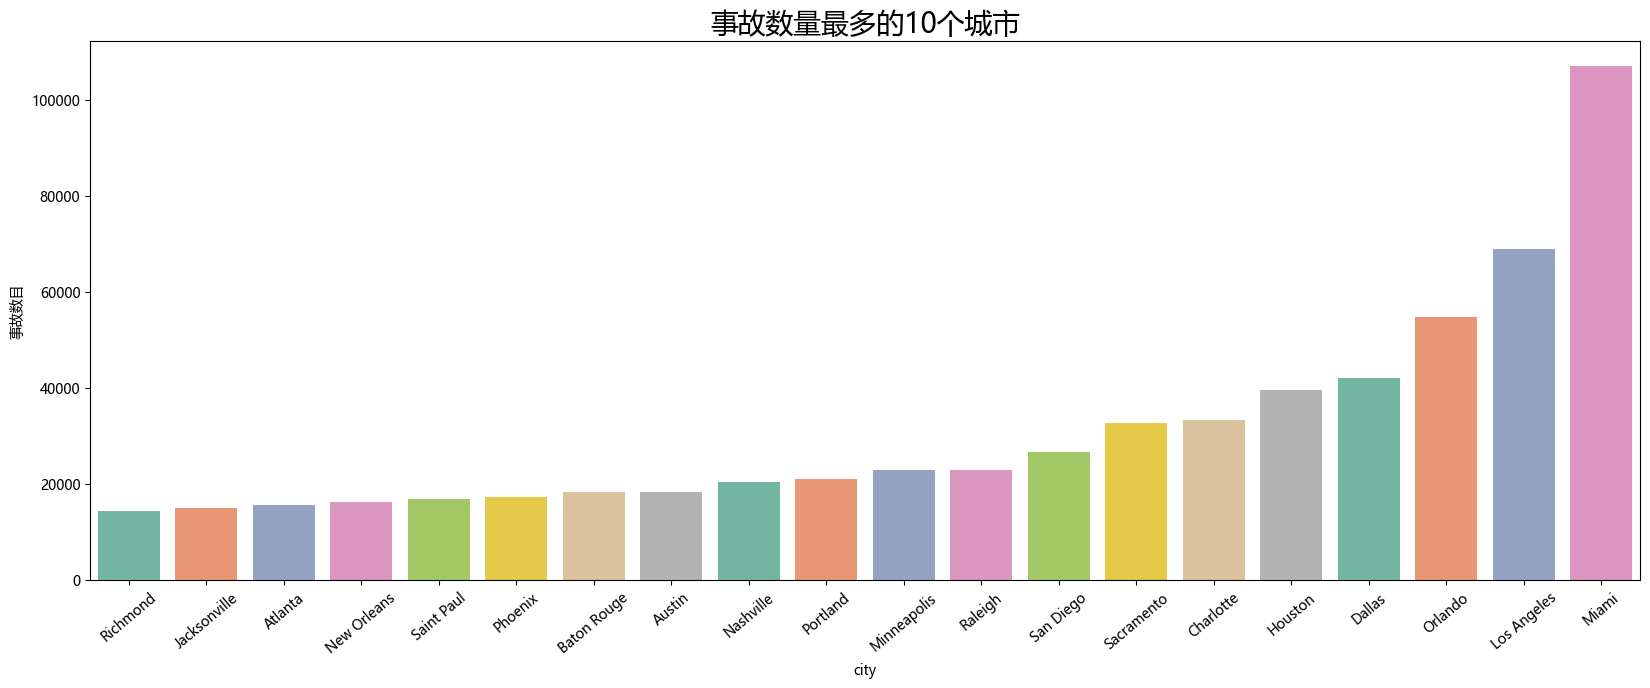

In [9]:
top_cities=df["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns=["city","事故数目"]

plt.figure(figsize=(20,7))
sns.barplot(x="city",y="事故数目",data=top_cities , palette='Set2')
plt.title("事故数量最多的10个城市",fontsize=20)
plt.xticks(rotation=40)
plt.show()

In [10]:
df['Street']

0               Outerbelt E
1                    I-70 E
2                    I-75 S
3                    I-77 N
4                    I-75 S
                 ...       
2845337        Pomona Fwy E
2845338               I-8 W
2845339    Garden Grove Fwy
2845340     San Diego Fwy S
2845341            CA-210 W
Name: Street, Length: 2845342, dtype: object

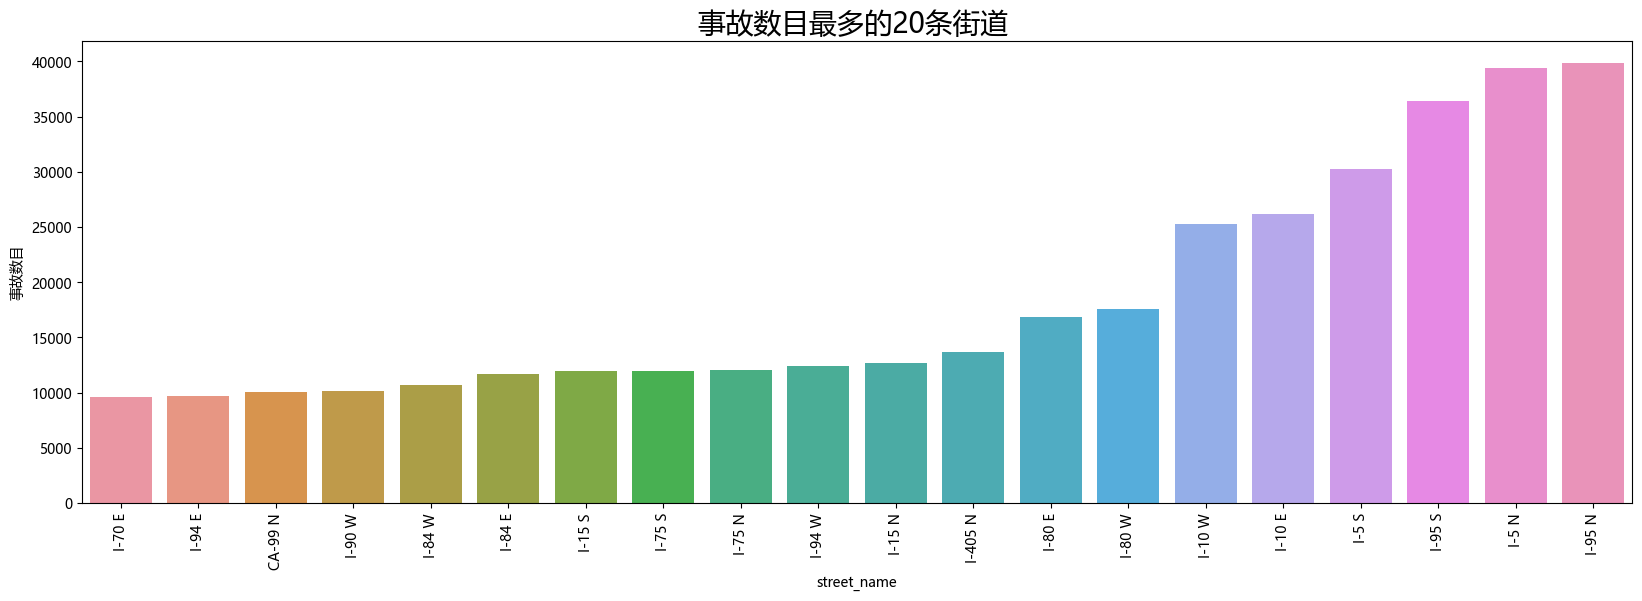

In [11]:
top_streets=df["Street"].value_counts().sort_values()[-20:].reset_index()
top_streets.columns=["street_name","事故数目"]

plt.figure(figsize=(20,6))
sns.barplot(x=top_streets["street_name"],y=top_streets["事故数目"])
plt.xticks(rotation=90)
plt.title("事故数目最多的20条街道 ",fontsize=20)
plt.show()

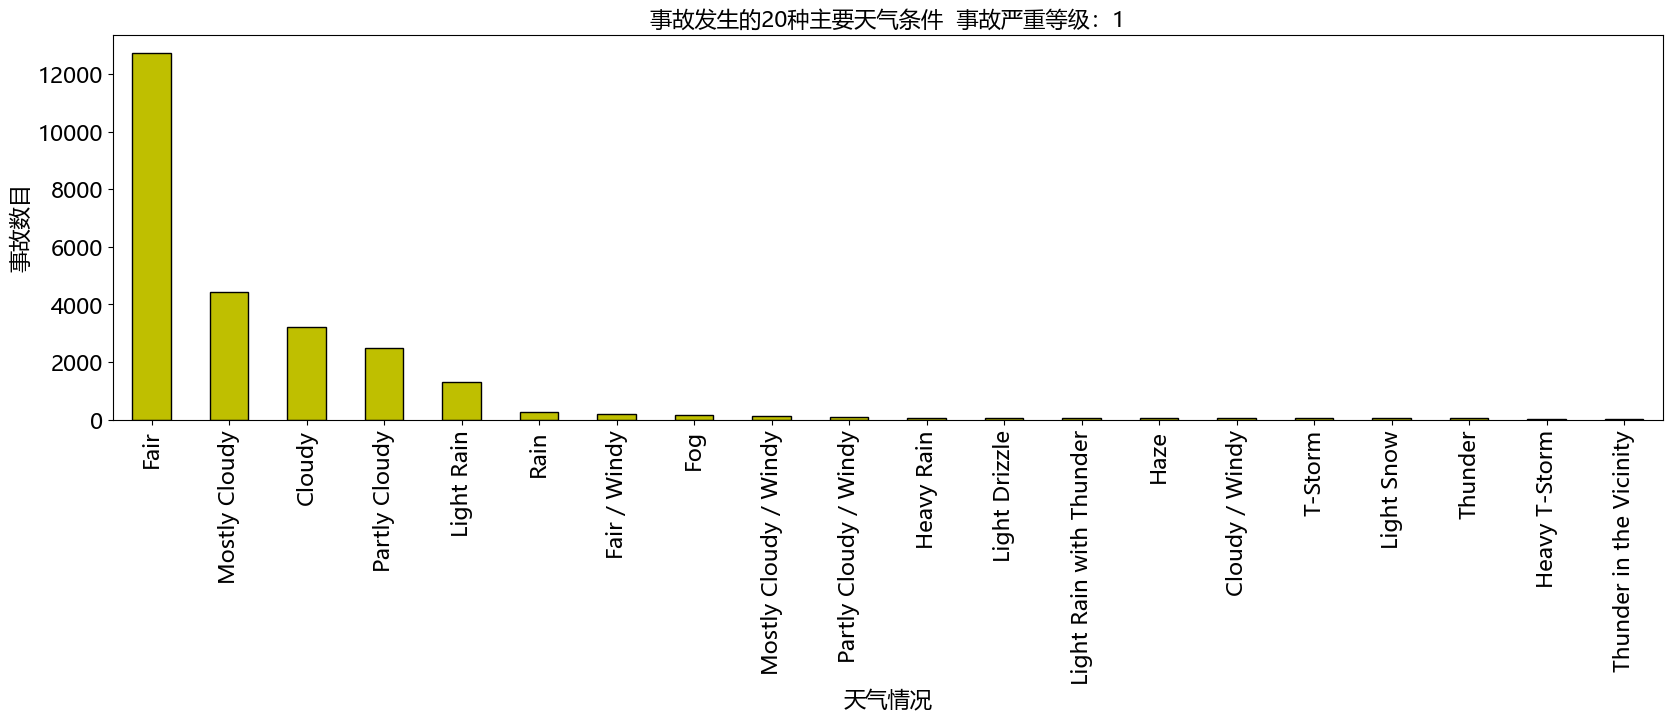

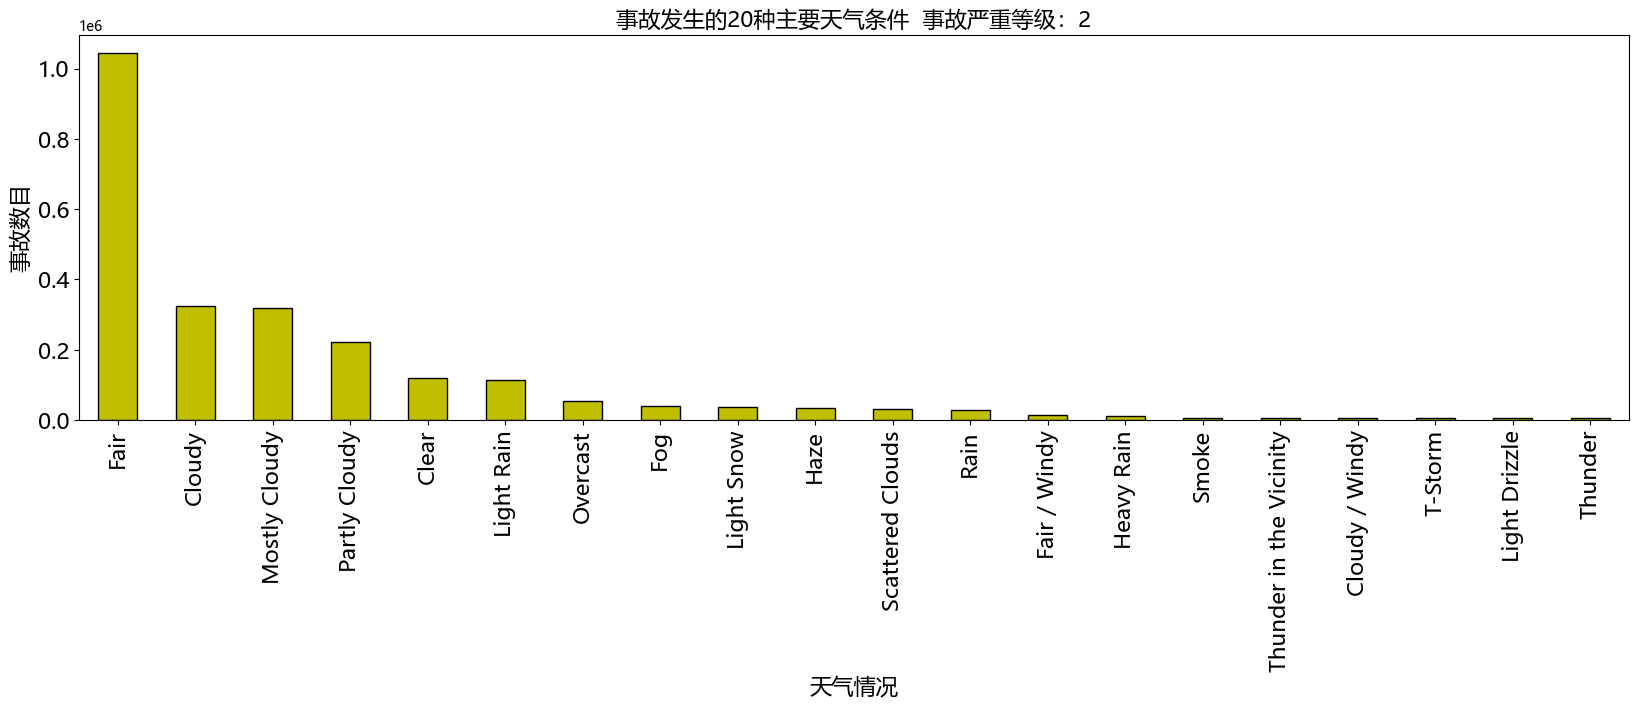

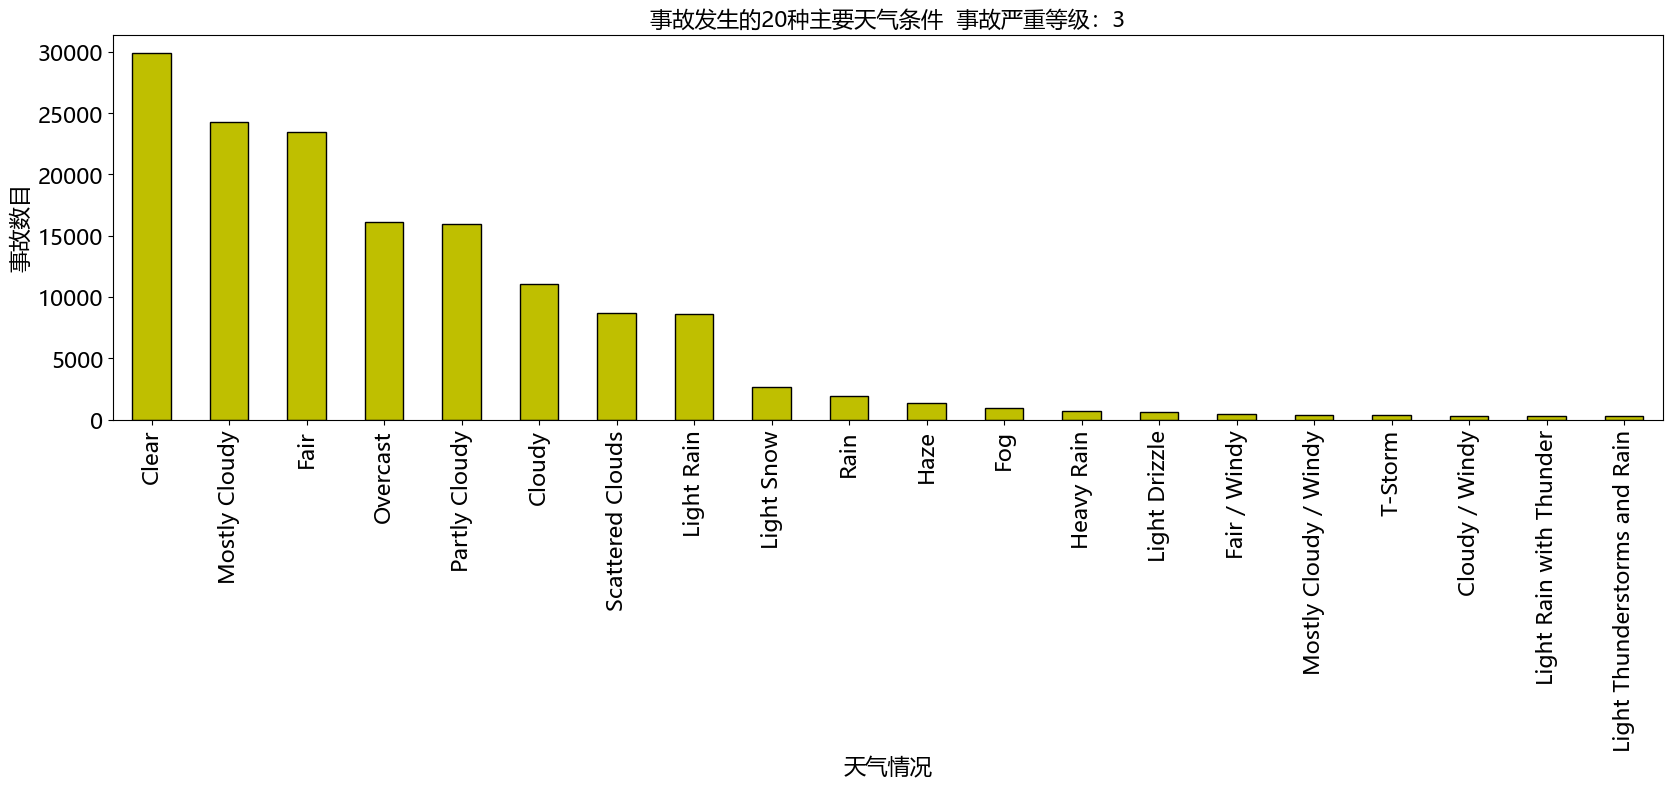

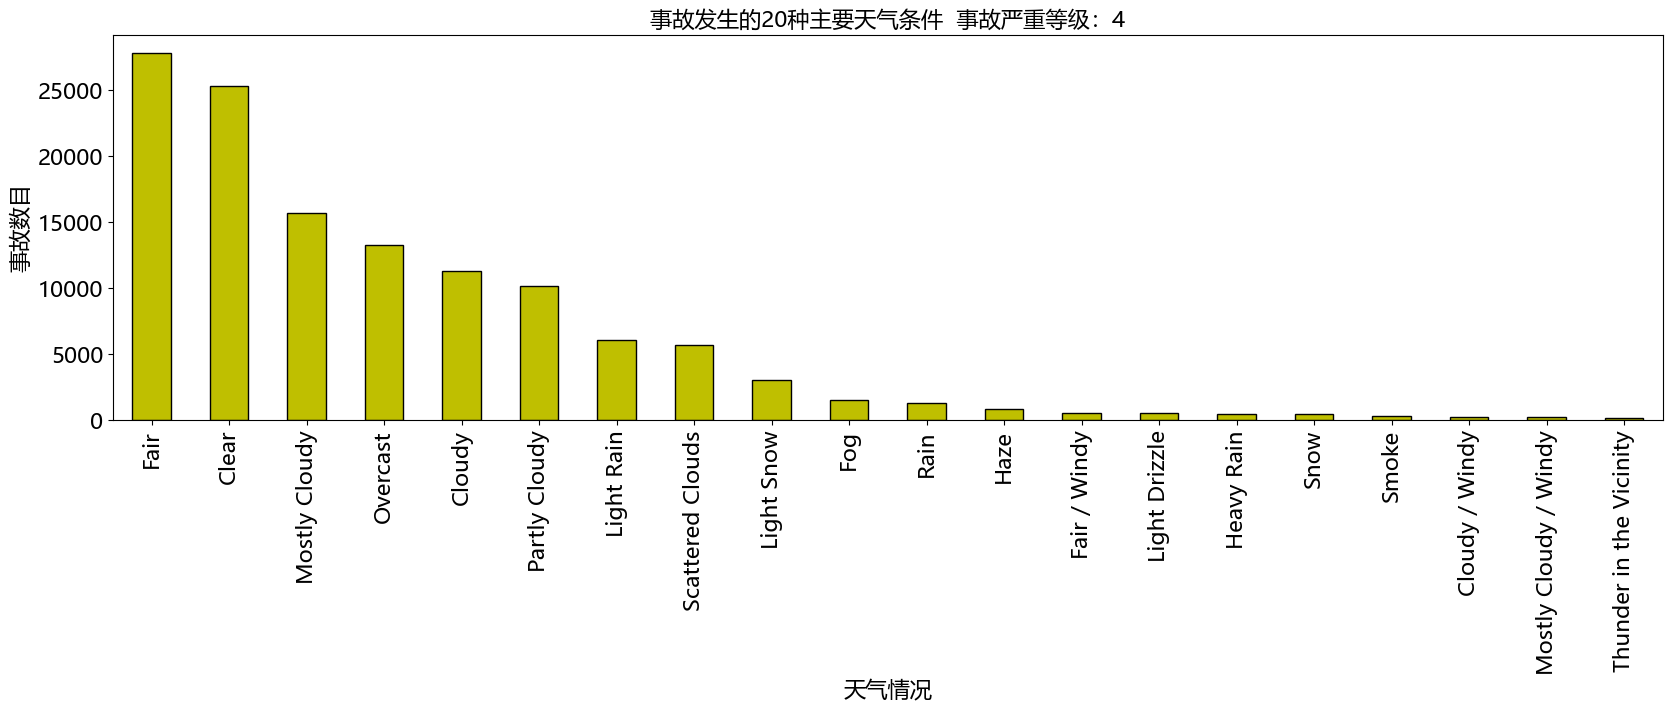

In [12]:
for x in np.arange(1,5):
    plt.subplots(figsize=(20,5))
    df.loc[df["Severity"] == x]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('天气情况',fontsize=16)
    plt.ylabel('事故数目',fontsize=16)
    plt.title('事故发生的20种主要天气条件  事故严重等级：' + str(x) ,fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

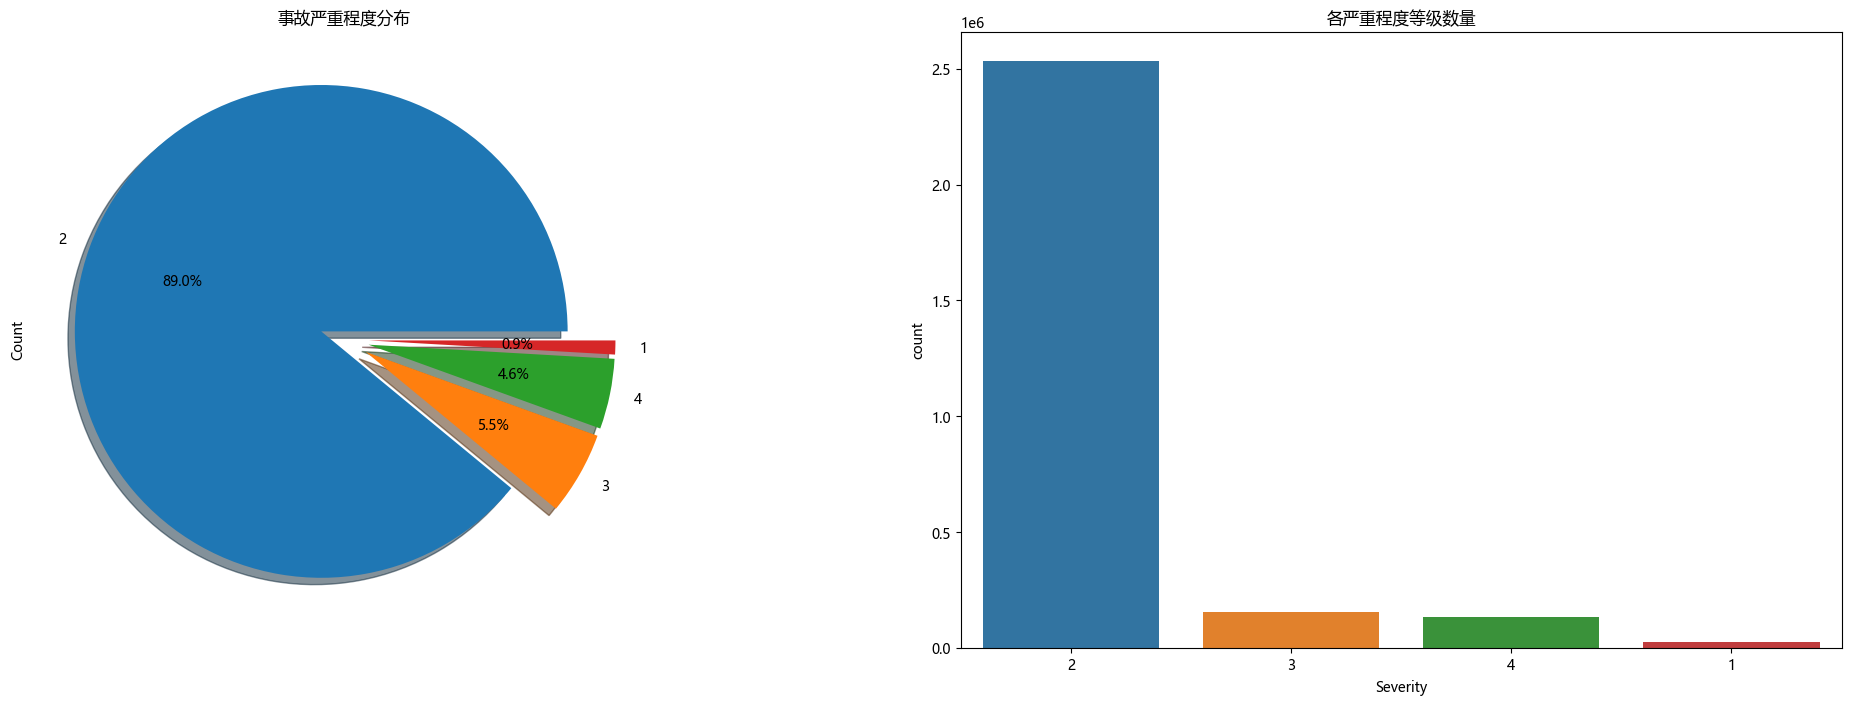

In [13]:
f,ax=plt.subplots(1,2,figsize=(25,8))
df['Severity'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('事故严重程度分布')
ax[0].set_ylabel('Count')
sns.countplot(data=df,x='Severity',order=df['Severity'].value_counts().index)
ax[1].set_title('各严重程度等级数量')
plt.show()

# 4 数据处理

## 4.1 处理日期数据

In [9]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

In [11]:
# 计算持续时间：事故持续时间=结束时间-开始时间(以分钟为单位)
df['Duration'] = df.End_Time - df.Start_Time 
df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds() / 60) )
print("事故总体平均持续时间为: ", (round(df['Duration'].mean(),3)), 'min')

事故总体平均持续时间为:  359.038 min


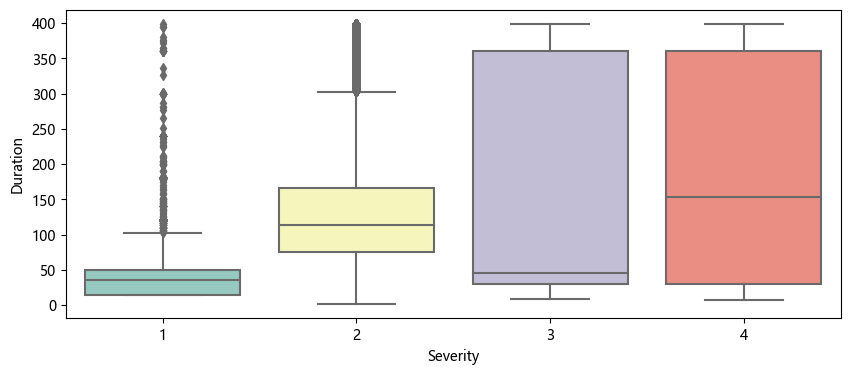

In [12]:
fig, axs = plt.subplots(ncols=1, figsize=(10, 4))
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Duration']<400),], palette="Set3")
plt.show()

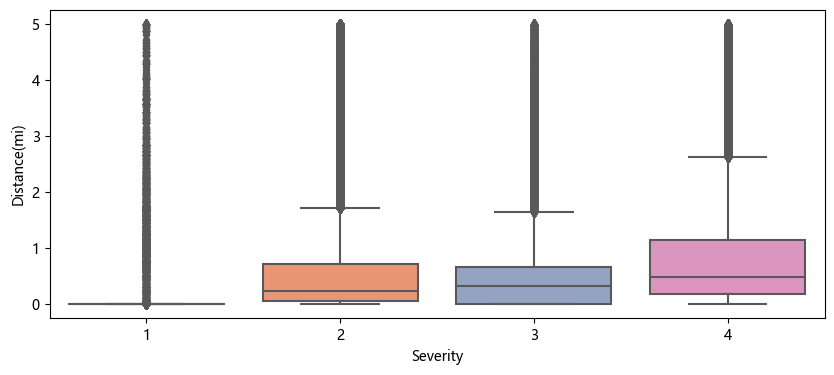

In [13]:
# #### Distance(mi):受事故影响的道路范围长度。
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(x="Severity", y="Distance(mi)",data=df.loc[(df['Distance(mi)']<5),], palette="Set2")
plt.show()

## 4.2 处理无效特征

#### “ID”不能提供任何有关事故本身的有用信息。
#### 'Distance(mi)'、'End_Time'(我们有开始时间)、'Duration'、'End_Lat'和'End_Lng'(我们有开始位置)只能在事故已经发生后收集，因此不能作为严重事故预测的预测因子。
#### 对于“Description”，数据集创建者已经从中提取了POI特征，因此除去这些特性。



In [14]:
df = df.drop(['ID','Description','Distance(mi)', 'End_Time', 'Duration', 
              'End_Lat', 'End_Lng'], axis=1)

## 4.3 清理分类特征

In [15]:
# 查看一些分类特征
cat_names = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("分类特征的唯一计数:")
for i in cat_names:
  print(i,df[i].unique().size)

分类特征的唯一计数:
Side 3
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


In [16]:
# 去掉'Country'和'Turning_Loop'，因为它们只有一个类。
df = df.drop(['Country','Turning_Loop'], axis=1)

#### 如果我们仔细观察分类特征，我们会发现'Wind_Direction'和'Weather_Condition'中的一些混乱。有必要先把它们清理干净。

### 4.3.1 Wind Direction

In [17]:
print("风向: ", df['Wind_Direction'].unique())

风向:  ['SW' 'Calm' 'WSW' 'WNW' 'West' 'NNW' 'South' 'W' 'NW' 'North' 'SSE' 'SSW'
 'ESE' 'SE' nan 'East' 'Variable' 'NNE' 'NE' 'ENE' 'CALM' 'S' 'VAR' 'N'
 'E']


In [18]:
# 简化风向特征
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("简化后的风向: ", df['Wind_Direction'].unique())

简化后的风向:  ['SW' 'CALM' 'W' 'N' 'S' 'NW' 'E' 'SE' nan 'VAR' 'NE']


### 4.3.2 Weather_Condition
#### 与天气有关的交通事故每年造成的死亡人数超过大规模天气灾害(来源:weather.com)。根据道路天气管理项目，大多数与天气有关的车祸发生在潮湿路面和下雨期间。冬季条件和雾是与天气有关的事故的另两个主要原因。为了提取这三种天气条件，我们首先看看'Weather_Condition'特性中有什么。

In [19]:
# 显示天气条件 

weather ='!'.join(df['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("天气: ", weather)

天气:  ['', 'Clear', 'Cloudy', 'Drifting Snow', 'Drizzle', 'Dust', 'Dust Whirls', 'Dust Whirls Nearby', 'Dust Whirlwinds', 'Duststorm', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Shower', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Fog', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Snow Nearby', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms', 'Tornado', 'Volcanic Ash', 'Widespre

In [20]:
# 为一些常见的天气条件创建特征，然后删除'Weather_Condition'。

df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [21]:
# Assign NA to created weather features where 'Weather_Condition' is null.

weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']
    df[i] = df[i].astype('bool')

df.loc[:,['Weather_Condition'] + weather]

df = df.drop(['Weather_Condition'], axis=1)

## 4.4 修复Datetime格式

In [22]:
# 天气时间和开始时间的平均差值
print("'Start_Time'与'Weather_Timestamp'的平均差值: ", 
(df.Weather_Timestamp - df.Start_Time).mean())

'Start_Time'与'Weather_Timestamp'的平均差值:  0 days 00:01:11.643297838


#### 因为'Weather_Timestamp'和'Start_Time'几乎一样，我们可以只保留'Start_Time'。然后将'Start_Time'映射到'Year'， 'Month'， 'Weekday'， 'Day'(一年)，'Hour'和'Minute'(一天)。

In [23]:
df = df.drop(["Weather_Timestamp"], axis=1)

df['Year'] = df['Start_Time'].dt.year

nmonth = df['Start_Time'].dt.month
df['Month'] = nmonth

df['Weekday']= df['Start_Time'].dt.weekday

days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df["Start_Time"].dt.day.values
df['Day'] = nday

df['Hour'] = df['Start_Time'].dt.hour

df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

df.loc[:4,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

,Start_Time,Year,Month,Weekday,Day,Hour,Minute
0,2016-02-08 00:37:08,2016,2,0,39,0,37.0
1,2016-02-08 05:56:20,2016,2,0,39,5,356.0
2,2016-02-08 06:15:39,2016,2,0,39,6,375.0
3,2016-02-08 06:51:45,2016,2,0,39,6,411.0
4,2016-02-08 07:53:43,2016,2,0,39,7,473.0


## 4.5 处理丢失的数据

### 4.5.1 删除特征

#### 从下面可以看到，许多列都缺少值。

In [24]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['特征', '缺失率(%)']
missing['缺失率(%)'] = missing['缺失率(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['缺失率(%)']>0,:]

,特征,缺失率(%)
4,Number,61.290031
5,Street,0.000070
7,City,0.004815
10,Zipcode,0.046356
11,Timezone,0.128596
12,Airport_Code,0.335601
13,Temperature(F),2.434646
14,Wind_Chill(F),16.505678
15,Humidity(%),2.568830
16,Pressure(in),2.080593


#### “Number”、“Wind_Chill(F)”和“Precipitation(in)”漏掉了15%以上。Drop NA和value imputation对这些特征不起作用。“Number”和“Wind_Chill(F)”将被删除，因为根据之前的研究，它们与严重程度并不高度相关，而“Precipitation(in)”（降水量）可能是一个有用的预测器，因此可以通过分离特征处理。
#### 删除这些特征: “Number”、 “Wind_Chill (F)”

In [25]:
df = df.drop(['Number','Wind_Chill(F)'], axis=1)

### 4.5.2 分离特征

#### 为“Precipitation(in)”（降水量）中的缺失值添加一个新特征，并用中位数替换缺失的值。

In [26]:
df['Precipitation_NA'] = 0

# 如果‘Precipitation(in)’=NaN,则'Precipitation_NA'=1
df.loc[df['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1   

df.loc[:10,['Precipitation(in)','Precipitation_NA']]

,Precipitation(in),Precipitation_NA
0,0.00,0
1,0.02,0
2,0.02,0
3,NaN,1
4,0.01,0
5,NaN,1
6,NaN,1
7,0.08,0
8,NaN,1
9,0.05,0


In [27]:
# 用中位数替换缺失值
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df.loc[:10,['Precipitation(in)','Precipitation_NA']]

,Precipitation(in),Precipitation_NA
0,0.00,0
1,0.02,0
2,0.02,0
3,0.00,1
4,0.01,0
5,0.00,1
6,0.00,1
7,0.08,0
8,0.00,1
9,0.05,0


### 4.5.3 删除缺失值

#### 在某些特征中缺失值的数量比总样本要小得多，可以对存在缺失值的行直接进行删除。

#### 删除以下存在缺失值的特征:

#### “City”
#### “Zipcode”
#### “Airport_Code”
#### “Sunrise_Sunset”
#### “Civil_Twilight”
#### “Nautical_Twilight”
#### “Astronomical_Twilight”

In [28]:
df = df.dropna(subset=['City','Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

### 4.5.4 缺失值插补

#### 其余的大部分列只有小的缺失部分可以填充。(这不是绝对必要的，我们也可以直接删除缺失值)

#### 连续天气数据


##### 存在缺失值的连续天气数据:

##### 1）Temperature(F) 温度
##### 2）Humidity(%) 湿度
##### 3）Pressure(in) 气压
##### 4）Visibility(mi) 能见度
##### 5）Wind_Speed(mph) 风速

#### 在进行插补之前，首先将天气特征按位置和时间进行分组，这与天气自然相关。
#### 之所以选择'Airport_Code'作为位置特征，是因为天气数据的来源是基于机场的气象站。
#### 然后数据将按“Start_Month”而不是“Start_Hour”分组，因为使用前者计算成本更低，丢失的值更少。最后，将缺失值替换为每组的中位数。

In [29]:
Weather_data=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']

In [30]:
Weather_data

['Temperature(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)']

In [31]:
# group_keys=False 可以禁用分组键所形成的索引，不会删去原始对象的索引。
# 根据'Airport_Code'和'Start_Month'分组数据，然后用中位数填充NaN

print("剩余缺失值的数量: ")
for i in Weather_data:
  df[i] = df.groupby(['Airport_Code','Month'],group_keys=False)[i].apply(lambda x: x.fillna(x.median()))
  print( i + " : " + df[i].isnull().sum().astype(str))

剩余缺失值的数量: 


C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

Temperature(F) : 6641


C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

Humidity(%) : 6644


C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Pressure(in) : 6635


C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

Visibility(mi) : 16717


C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\A\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: R

Wind_Speed(mph) : 16593


#### 仍然有一些缺失的值，但少了很多。为了简单起见，直接删除这些特征。

In [32]:
df = df.dropna(subset=Weather_data)

#### 分类天气特征
#### 对于分类天气特征，将使用众数（majority)而不是中位数(median)来替换缺失的值。

In [33]:
df[weather]

,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
0,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
2845337,False,False,False,False,False,False,False
2845338,False,False,False,False,False,False,False
2845339,False,True,False,False,False,False,False
2845340,False,False,False,False,False,False,False


In [34]:
# 根据'Airport_Code'和'Start_Month'对数据进行分组，然后用众数填充缺失值
from collections import Counter
weather_cat = ['Wind_Direction'] + weather
print("Count of missing values that will be dropped: ")
for i in weather_cat:
  df[i] = df.groupby(['Airport_Code','Month'],group_keys=False)[i].apply(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull())==False else x)
  print(i + " : " + df[i].isnull().sum().astype(str))



Count of missing values that will be dropped: 
Wind_Direction : 19471
Clear : 0
Cloud : 0
Rain : 0
Heavy_Rain : 0
Snow : 0
Heavy_Snow : 0
Fog : 0


In [35]:
# drop na
df = df.dropna(subset=weather_cat)

In [36]:
df.shape

(2796569, 49)

In [37]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['特征', '缺失率(%)']
missing['缺失率(%)'] = missing['缺失率(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['缺失率(%)']>0,:]

,特征,缺失率(%)
4,Street,0.000036


# 5.EXPLORATION & ENGINEERING

In [38]:
df['Severity4'] = 0
df.loc[df['Severity'] == 4, 'Severity4'] = 1
df = df.drop(['Severity'], axis = 1)
df.Severity4.value_counts()

0    2668472
1     128097
Name: Severity4, dtype: int64

In [39]:
def resample(dat, col, n):
    return pd.concat([dat[dat[col]==1].sample(n, replace = True),
                   dat[dat[col]==0].sample(n)], axis=0)
df_bl = resample(df, 'Severity4', 100000)
print('resampled data:', df_bl.Severity4.value_counts())

resampled data: 1    100000
0    100000
Name: Severity4, dtype: int64


In [40]:
df_bl.head(10)

,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,Timezone,...,Heavy_Snow,Fog,Year,Month,Weekday,Day,Hour,Minute,Precipitation_NA,Severity4
2499570,2019-03-06 15:39:11,28.544288,-81.285830,S Goldenrod Rd,L,Orlando,Orange,FL,32807,US/Eastern,...,False,False,2019,3,2,65,15,939.0,1,1
2534115,2019-01-07 06:31:00,43.278979,-88.518368,N2390 State Road 67,R,Neosho,Dodge,WI,53059-9653,US/Central,...,False,False,2019,1,0,7,6,391.0,0,1
2732595,2017-11-21 08:18:24,47.555680,-122.334210,S Dawson St,R,Seattle,King,WA,98108-2243,US/Pacific,...,False,False,2017,11,1,325,8,498.0,0,1
2539094,2019-01-16 06:15:41,39.016550,-77.098720,Capital Beltway W,R,Bethesda,Montgomery,MD,20814,US/Eastern,...,True,True,2019,1,2,16,6,375.0,1,1
2116941,2020-05-14 17:04:43,41.549200,-87.930810,187th St,L,Mokena,Will,IL,60448-8282,US/Central,...,False,False,2020,5,3,134,17,1024.0,0,1
1099120,2021-11-19 14:57:00,35.883667,-77.491406,Firestone Ln,L,Tarboro,Edgecombe,NC,27886-8506,US/Eastern,...,False,False,2021,11,4,323,14,897.0,0,1
2597511,2018-10-23 19:22:27,38.699720,-75.169460,John J Williams Hwy,R,Lewes,Sussex,DE,19958-4389,US/Eastern,...,False,False,2018,10,1,296,19,1162.0,1,1
141505,2017-02-13 03:48:00,40.841317,-78.132403,Port Matilda Hwy,R,Port Matilda,Centre,PA,16870,US/Eastern,...,False,False,2017,2,0,44,3,228.0,1,1
2514051,2019-01-31 14:45:06,33.686568,-117.858356,Main St,R,Irvine,Orange,CA,92614-6701,US/Pacific,...,False,False,2019,1,3,31,14,885.0,0,1
2822231,2019-07-03 11:38:58,33.391910,-111.891550,Price Fwy S,R,Tempe,Maricopa,AZ,85282,US/Mountain,...,True,True,2019,7,2,184,11,698.0,1,1


In [41]:
df_bl.shape

(200000, 49)

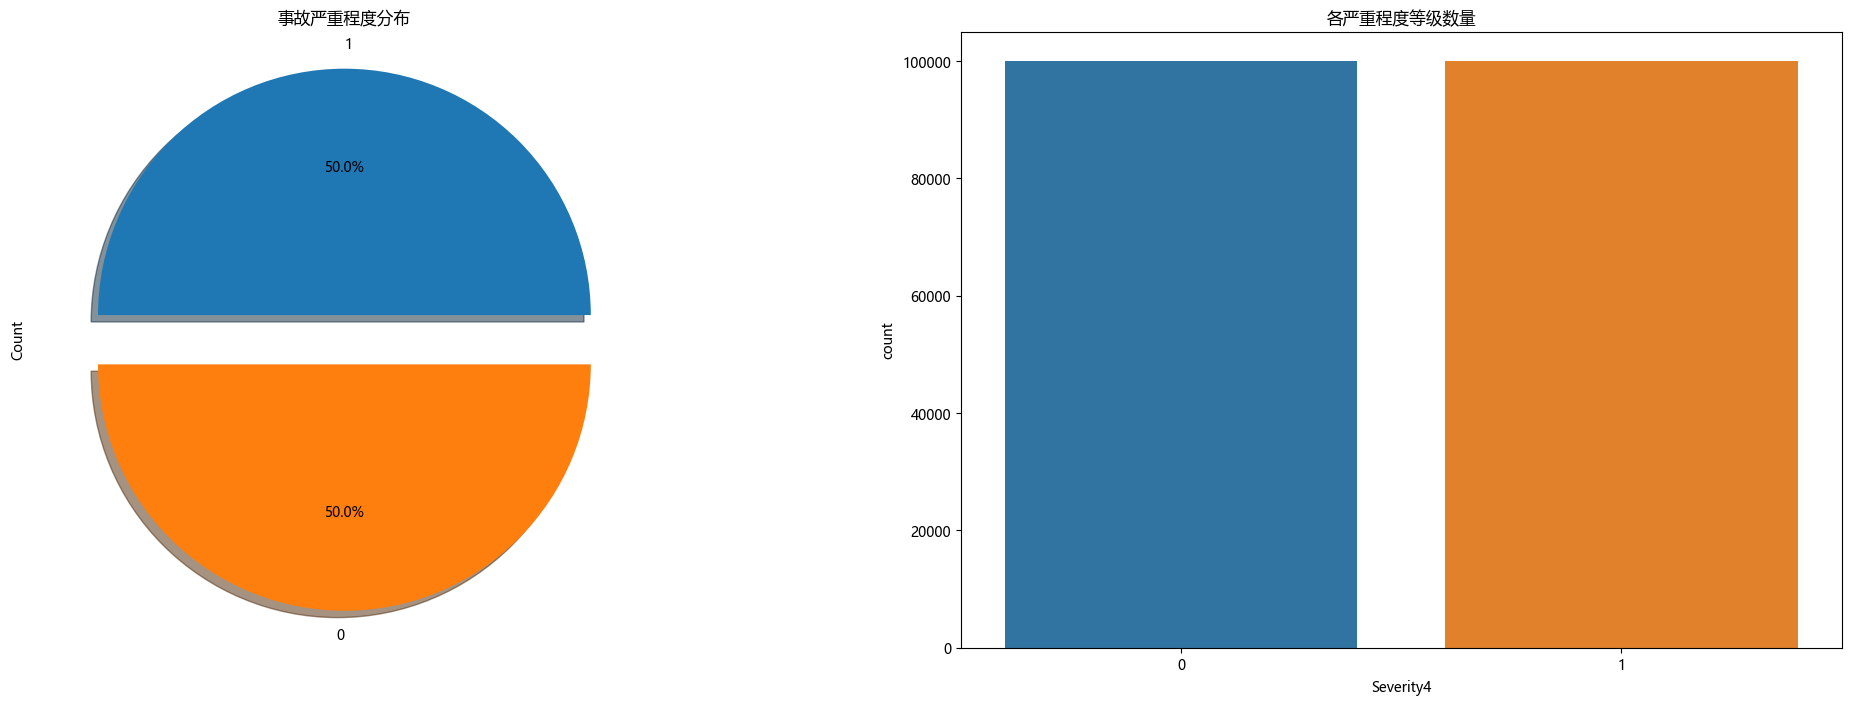

In [42]:
f,ax=plt.subplots(1,2,figsize=(25,8))

df_bl['Severity4'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('事故严重程度分布')
ax[0].set_ylabel('Count')
sns.countplot(data=df_bl,x='Severity4',order=df['Severity4'].value_counts().index)
ax[1].set_title('各严重程度等级数量')
plt.show()

## 5.1 Time Features

### 5.1.1 Year

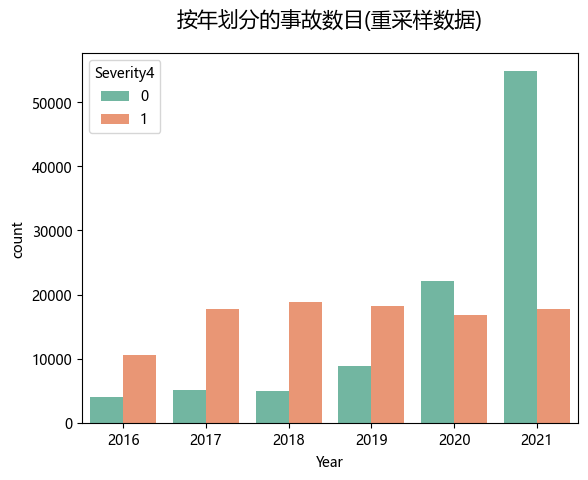

In [43]:
df_bl.Year = df_bl.Year.astype(str)
sns.countplot(x='Year', hue='Severity4', data=df_bl ,
              order=['2016','2017','2018','2019','2020','2021'],palette="Set2")
plt.title('按年划分的事故数目(重采样数据)', size=15, y=1.05)
plt.show()

##### 2021年严重等级为其他的事故数量不可能是2019年之前的5倍，而4级的事故数量却更少。

##### 我创建了 2016 年至 2021年严重级别为 4 的事故热图，看看它们的实际分布情况。

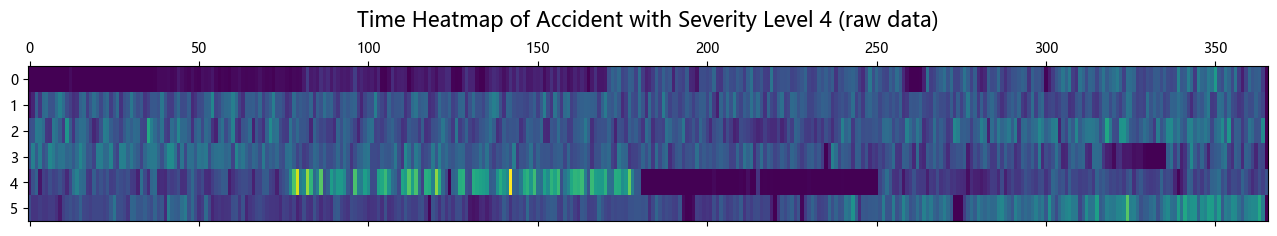

In [44]:
# create a dataframe used to plot heatmap
df_date = df.loc[:,['Start_Time','Severity4']]         # create a new dateframe only containing time and severity
df_date['date'] = df_date['Start_Time'].dt.normalize() # keep only the date part of start time
df_date = df_date.drop(['Start_Time'], axis = 1)
df_date = df_date.groupby('date').sum()                # sum the number of accidents with severity level 4 by date
df_date = df_date.reset_index().drop_duplicates()

# join the dataframe with full range of date from 2016 to 2020
full_date = pd.DataFrame(pd.date_range(start="2016-01-02",end="2021-12-31"))    
df_date = full_date.merge(df_date, how = 'left',left_on = 0, right_on = 'date')
df_date['date'] = df_date.iloc[:,0]
df_date = df_date.fillna(0)
df_date = df_date.iloc[:,1:].set_index('date')

# group by date
groups = df_date['Severity4'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    if name.year != 2020:
        years[name.year] = np.append(group.values,0)
    else:
        years[name.year] = group.values
  

# plot
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.title('Time Heatmap of Accident with Severity Level 4 (raw data)', y=1.2, fontsize=15)
plt.show()

##### 热图表明在 2019 年 2 月之后发生了一些变化。也许这是MapQuest定义严重性的方式或他们收集数据的方式。无论如何，我们必须再次缩小数据范围。由于 2019 年 2 月之后的数据不平衡程度较低，未来数据更有可能是这样的，因此删除 2019 年 3 月之前的数据可能是最佳选择。

In [ ]:
#df = df.loc[df['Start_Time'] > "2019-03-10",:]
#df = df.drop(['Year', 'Start_Time'], axis=1)
#df['Severity4'].value_counts()

### 5.1.2 Month

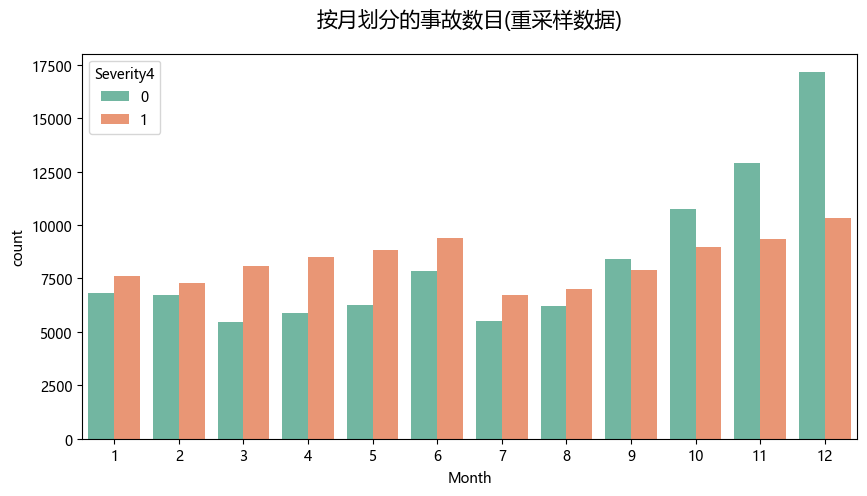

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('按月划分的事故数目(重采样数据)', size=15, y=1.05)
plt.show()

##### 可以看到，两类等级的事故在一年中的数量变化趋势基本一致 ：从3月到6月不断增加，在7月迅速降低后，再次开始增加并在12月达到高峰。


### 5.1.3 Weekday

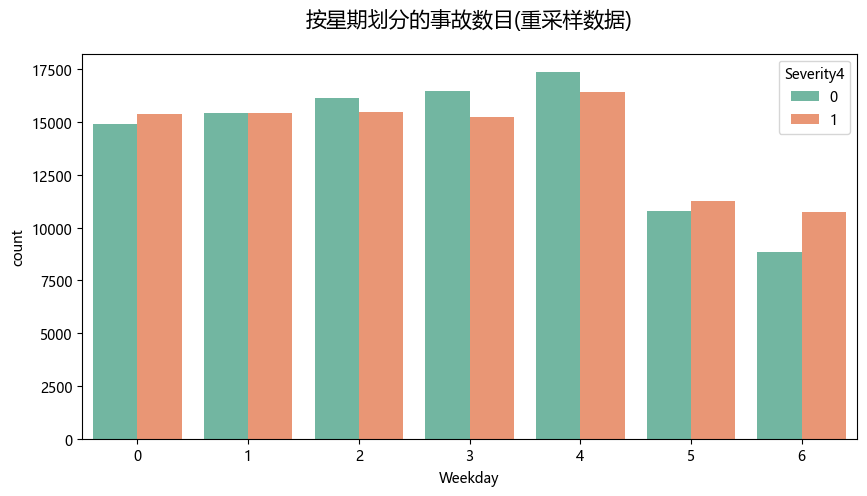

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('按星期划分的事故数目(重采样数据)', size=15, y=1.05)
plt.show()

##### 周末的事故数量要少得多，而4级事故的比例更高。

### 5.1.4 Period-of-Day

C:\Users\A\AppData\Local\Temp\ipykernel_8724\2206097897.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


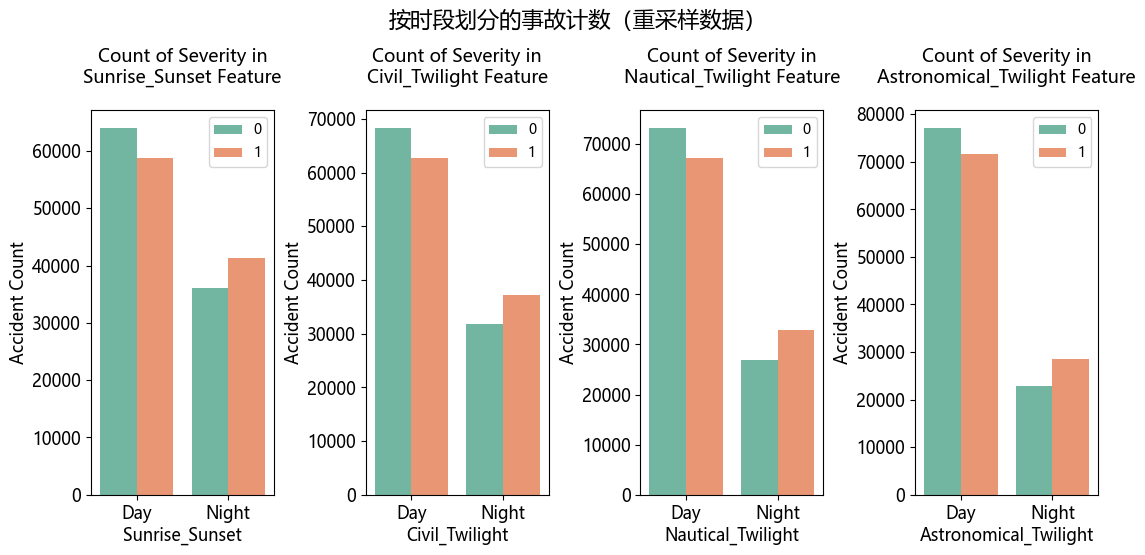

In [47]:
period_features = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(13, 5))

plt.subplots_adjust(wspace = 0.5)
for i, feature in enumerate(period_features, 1):    
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in\n{} Feature'.format(feature), size=13, y=1.05)
fig.suptitle('按时段划分的事故计数（重采样数据）',y=1.08, fontsize=16)
plt.show()

##### 夜间事故较少，但更有可能是严重的。

### 5.1.5 Hour

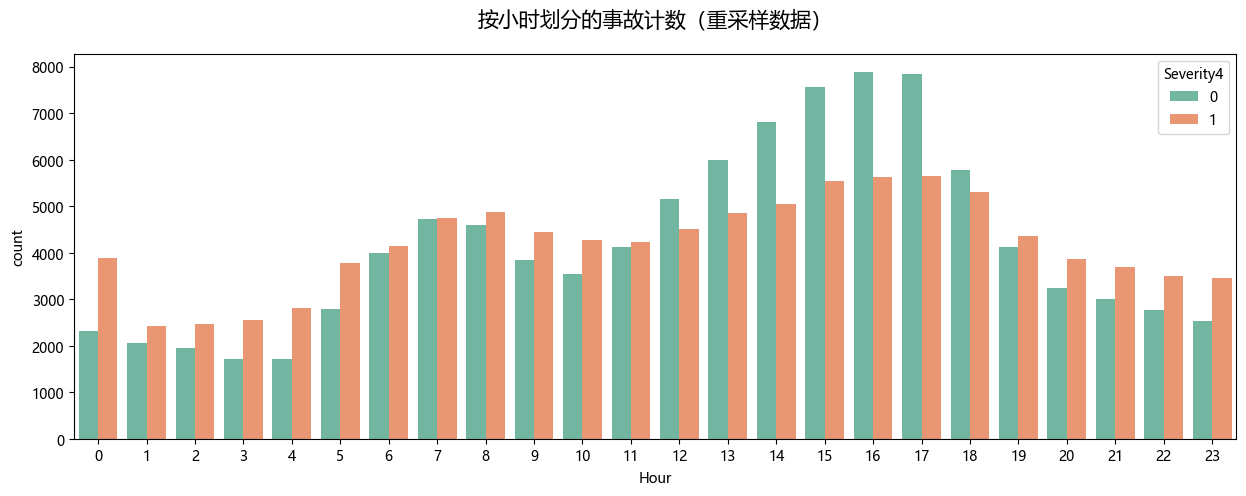

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('按小时划分的事故计数（重采样数据）', size=15, y=1.05)
plt.show()

##### 大多数事故发生在白天，尤其是上午高峰和下午高峰。到了夜间和凌晨，事故发生的数目更少，但更有可能是严重的。

## 5.2 Address Features

### 5.2.1 时区

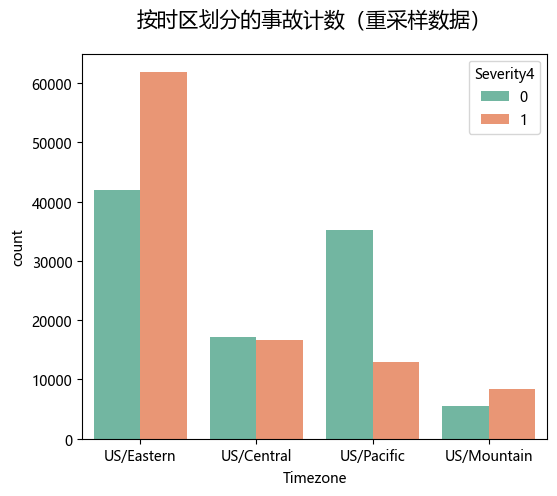

In [49]:
plt.figure(figsize=(6,5))
chart = sns.countplot(x='Timezone', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("按时区划分的事故计数（重采样数据）", size=15, y=1.05)
plt.show()

##### 东部时区是最危险的时区

### 5.2.2 State

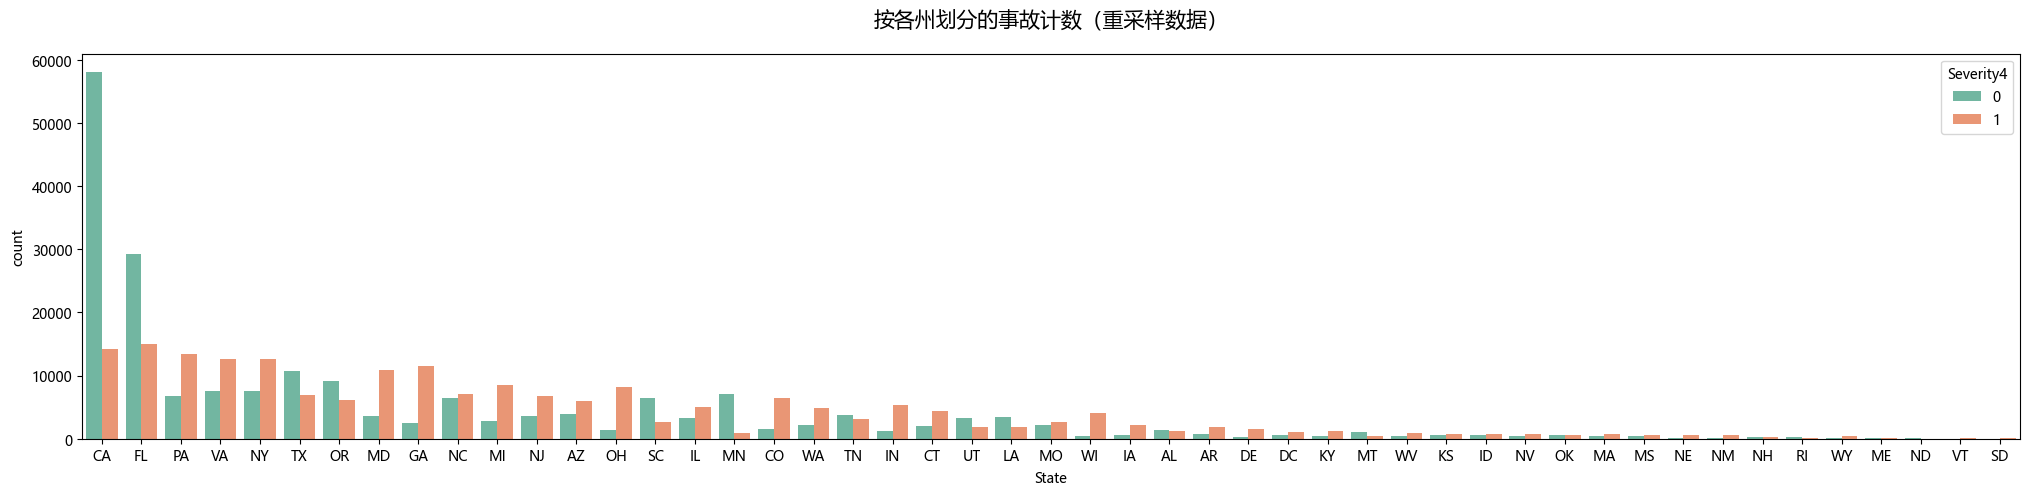

In [53]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity4', 
                      data=df_bl ,palette="Set2", order=df_bl['State'].value_counts().index)
plt.title("按各州划分的事故计数（重采样数据）", size=15, y=1.05)
plt.show()

##### 佛罗里达州、加利福尼亚州、德克萨斯州是事故最多的前 3 个州。如果我们按严重性为 4 级的事故数量对情节进行排序，那就另当别论了。佛罗里达州是顶部，接下来的两个是加利福尼亚州和宾夕法尼亚州。

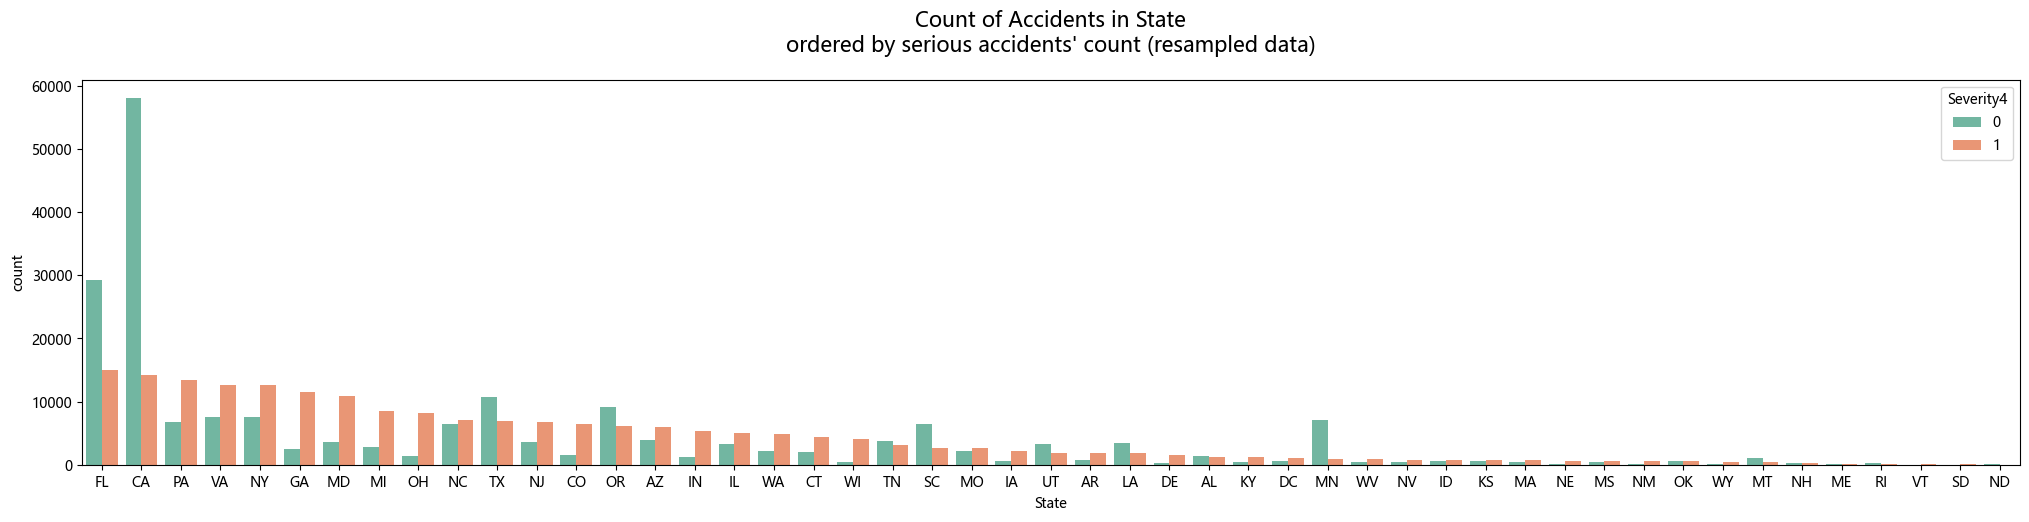

In [54]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity4', data=df_bl ,palette="Set2", order=df_bl[df_bl['Severity4']==1]['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by serious accidents' count (resampled data)", size=15, y=1.05)
plt.show()

### 5.2.3 Side

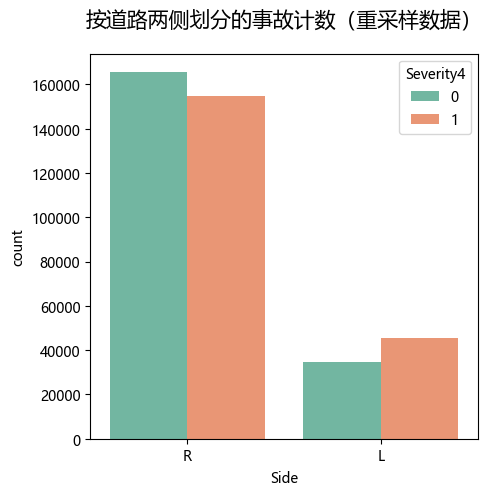

In [56]:
plt.figure(figsize=(5,5))
chart = sns.countplot(x='Side', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("按道路两侧划分的事故计数（重采样数据）", size=15, y=1.05)
plt.show()

##### 道路的右侧比左侧危险得多。

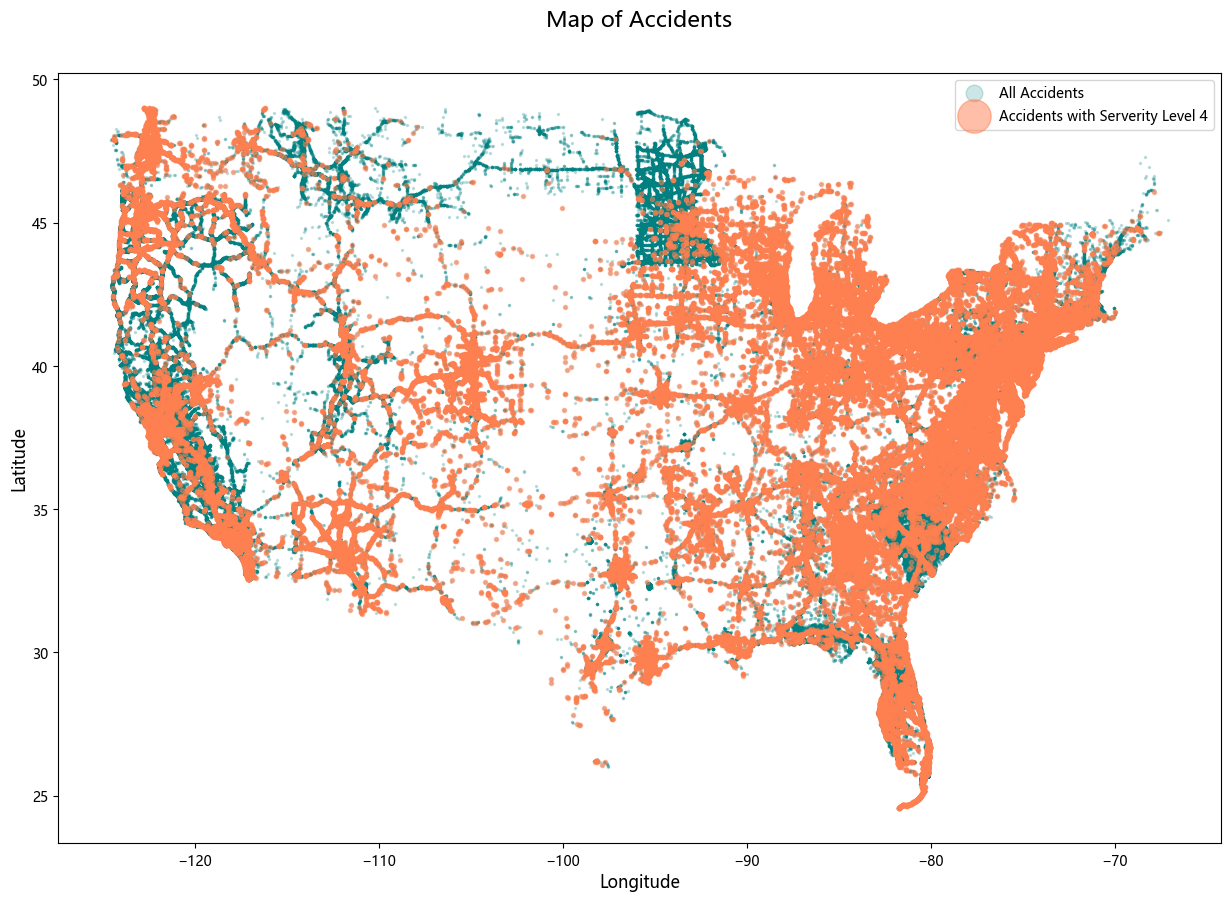

In [66]:
df_4 = df[df['Severity4']==1]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=df, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Accidents with Serverity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

C:\Users\A\AppData\Local\Temp\ipykernel_20416\206488058.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, i)
C:\Users\A\AppData\Local\Temp\ipykernel_20416\206488058.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, i)
C:\Users\A\AppData\Local\Temp\ipykernel_20416\206488058.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, i)
C:\Users\A\AppData\Local\Temp\ipykernel_20416\206488058.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as nee

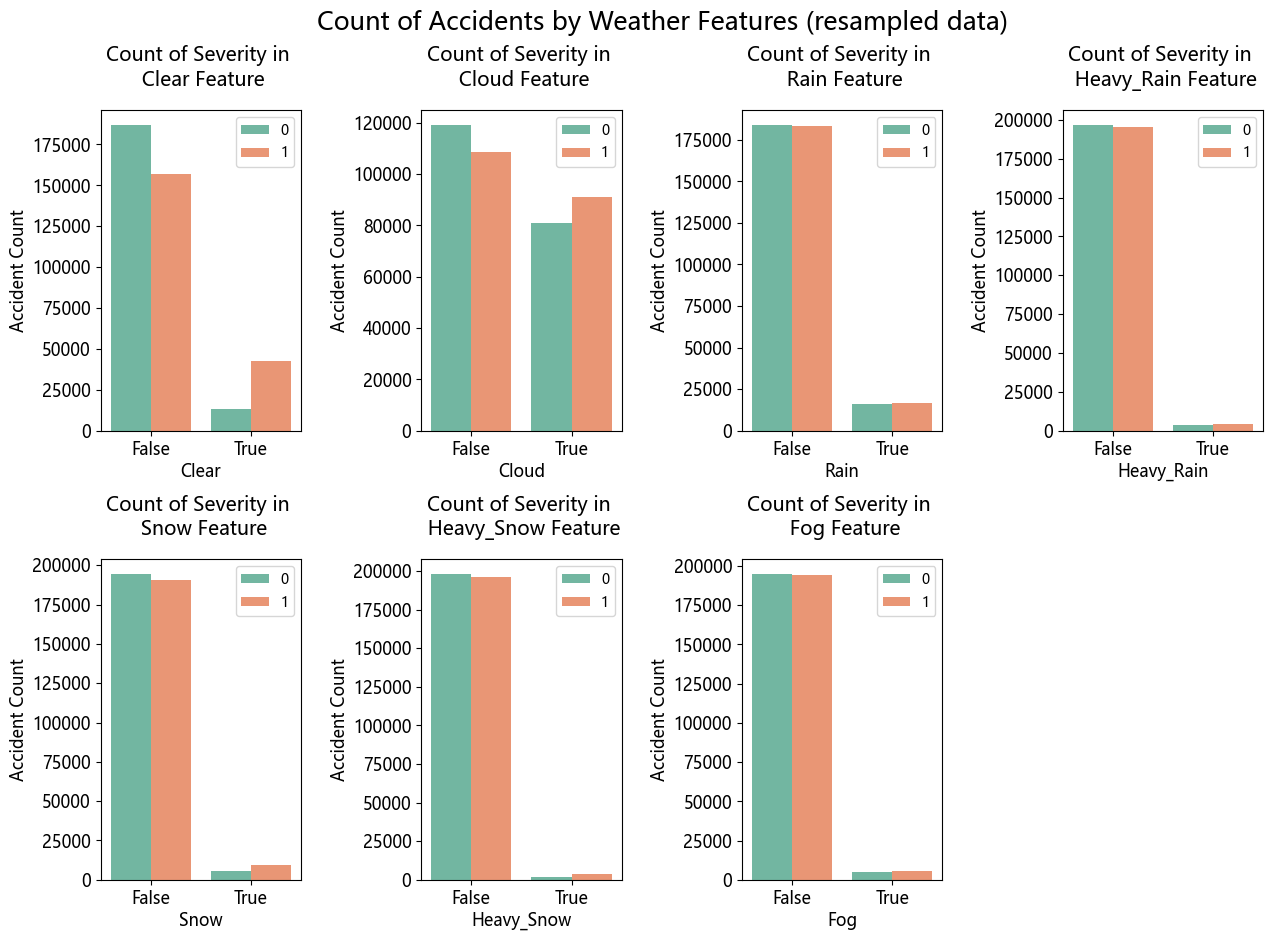

In [67]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.6)
for i, feature in enumerate(weather, 1):    
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in \n {} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

##### 从上面看，在雨天或雪天发生事故的可能性较小，而在阴天则不太可能发生事故。

# 6 Model